In [ ]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# LOADING THE DATA

data = pd.read_csv('/content/drive/MyDrive/Data Set/breast-cancer.csv')
print("Data loaded successfully! First 5 rows:")
print(data.head())

Data loaded successfully! First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  

In [ ]:
# 2. PREPROCESSING

le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

print("\nClass distribution:")
print(data['diagnosis'].value_counts())

X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Class distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64



Training Random Forest...
Random Forest Accuracy: 0.9737
Confusion Matrix:
[[72  0]
 [ 3 39]]


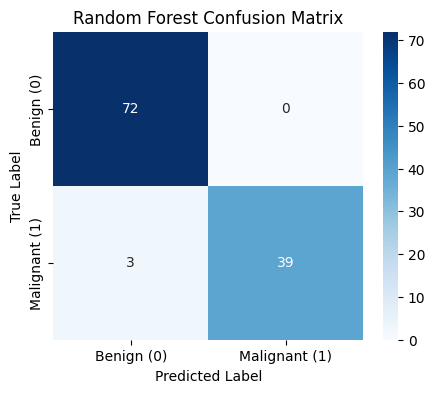


Training AdaBoost...
AdaBoost Accuracy: 0.9825
Confusion Matrix:
[[72  0]
 [ 2 40]]


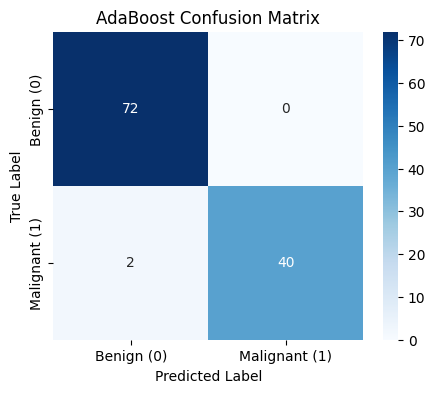


Training XGBoost...
XGBoost Accuracy: 0.9561
Confusion Matrix:
[[72  0]
 [ 5 37]]


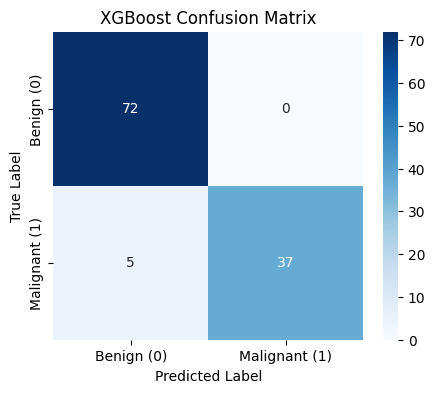

In [ ]:
# 3. MODEL TRAINING

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {'accuracy': accuracy,'confusion_matrix': cm,'model': model}

    print(f"{name} Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Benign (0)', 'Malignant (1)'],yticklabels=['Benign (0)', 'Malignant (1)'])
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [ ]:
# 4. RESULTS COMPARISON

print("\nFINAL COMPARISON:")
print("{:<15} {:<10}".format('Model', 'Accuracy'))
print("-"*25)
for name, result in results.items():
    print("{:<15} {:.4f}".format(name, result['accuracy']))


FINAL COMPARISON:
Model           Accuracy  
-------------------------
Random Forest   0.9737
AdaBoost        0.9825
XGBoost         0.9561


In [ ]:
# 5. ERROR ANALYSIS

print("\nERROR ANALYSIS:")
for name, result in results.items():
    cm = result['confusion_matrix']
    fp = cm[0,1]  # False Positives
    fn = cm[1,0]  # False Negatives
    print(f"\n{name}:")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")


ERROR ANALYSIS:

Random Forest:
False Positives: 0
False Negatives: 3

AdaBoost:
False Positives: 0
False Negatives: 2

XGBoost:
False Positives: 0
False Negatives: 5


In [ ]:
# 6.THE BEST MODEL

best_model_name = max(results, key=lambda x: results[x]['accuracy'])
print("The best model is",best_model_name)

The best model is AdaBoost
